<a href="https://colab.research.google.com/github/shubham10693/Technocolabs/blob/main/Toxic_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords          
from google.colab import files
from nltk.stem import WordNetLemmatizer   
from nltk.corpus import stopwords        

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%cd /content/drive/My Drive/Toxic _comment/

/content/drive/My Drive/Toxic _comment


In [31]:
train =pd.read_csv('train.csv')

In [33]:
test = pd.read_csv('test.csv')

In [107]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0


In [43]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [34]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [35]:
train.shape

(159571, 8)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [37]:
test.shape

(153164, 2)

In [39]:
nltk.download('stopwords')
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [40]:
length = train['comment_text'].str.len()

print("Max length of a string is {}".format(length.max()))
print("Mean length of a string is {}".format(length.mean()))
print("Minimum length of a string is {}".format(length.min()))

Max length of a string is 5000
Mean length of a string is 394.0732213246768
Minimum length of a string is 6


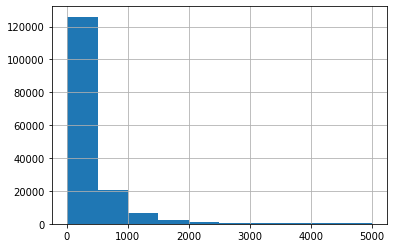

In [41]:
length.hist()

In [42]:
#Check for any null comments in the dataset
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [45]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
train['comment_text'] = train['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
train['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [52]:
df_toxic = train.loc[:,['id','comment_text','toxic']]

df_toxic['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [71]:
df_sev_tox = train.loc[:,['id','comment_text','severe_toxic']]
df_obscene = train.loc[:,['id','comment_text','obscene']]
df_threat = train.loc[:,['id','comment_text','threat']]
df_insult = train.loc[:,['id','comment_text','insult']]
df_id_hate = train.loc[:,['id','comment_text','identity_hate']]

In [50]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [91]:
def vec_tf(df_1,label,vectorizer,ngram):

    X = df_1.comment_text
    y = df_1[label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    vec = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec  = vec.transform(X_test)     

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_vec, y_train)
    print('RandomForestClassifier done')

    lr = LogisticRegression()
    lr.fit(X_train_vec, y_train)
    print('LogisticRegression done')

    mnb = MultinomialNB()
    mnb.fit(X_train_vec, y_train)
    print('MultinomialNB done')
    
    f1_score_data = {'F1 Score':[f1_score(randomforest.predict(X_test_vec), y_test),
                                f1_score(lr.predict(X_test_vec), y_test), 
                                f1_score(mnb.predict(X_test_vec), y_test)
                                ]} 
                          
    df_f1 = pd.DataFrame(f1_score_data, index=['Random Forest','Log Regression','MultinomialNB'])  

    return df_f1

    

In [96]:
df_tox_vec = vec_tf(df_toxic, 'toxic', TfidfVectorizer, (1,1))
df_tox_vec.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)
df_tox_vec

RandomForestClassifier done


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression done
MultinomialNB done


,F1 Score(toxic)
Random Forest,0.726590
Log Regression,0.712742
MultinomialNB,0.332365


In [77]:
df_sev_vec = vec_tf(df_sev_tox, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_vec.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

RandomForestClassifier done
LogisticRegression done
MultinomialNB done


In [78]:
df_sev_vec

,F1 Score(severe_toxic)
Random Forest,0.110701
Log Regression,0.345821
MultinomialNB,0.000000


In [89]:
df_obscene_vec = vec_tf(df_obscene, 'obscene', TfidfVectorizer, (1,1))
df_obscene_vec.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
df_obscene_vec

RandomForestClassifier done
LogisticRegression done
MultinomialNB done


,F1 Score(obscene)
Random Forest,0.772008
Log Regression,0.731096
MultinomialNB,0.226454


In [90]:
df_threat_vec = vec_tf(df_threat, 'threat', TfidfVectorizer, (1,1))
df_threat_vec.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
df_threat_vec

LogisticRegression done
MultinomialNB done
RandomForestClassifier done
Time taken: 97.64717698097229 seconds


,F1 Score(threat)
Log Regression,0.243902
MultinomialNB,0.000000
Random Forest,0.093333


In [92]:
df_insult_vec = vec_tf(df_insult, 'insult', TfidfVectorizer, (1,1))
df_insult_vec.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
df_insult_vec

RandomForestClassifier done
LogisticRegression done
MultinomialNB done


,F1 Score(insult)
Random Forest,0.611740
Log Regression,0.612759
MultinomialNB,0.096979


In [94]:
df_ide_hate_vec = vec_tf(df_id_hate, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_hate_vec.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
df_ide_hate_vec

RandomForestClassifier done
LogisticRegression done
MultinomialNB done


,F1 Score(insult)
Random Forest,0.115139
Log Regression,0.261860
MultinomialNB,0.000000


In [97]:
f1_complete = pd.concat([df_tox_vec, df_sev_vec, df_obscene_vec, df_threat_vec, df_insult_vec, df_ide_hate_vec], axis=1)
f1_complete.transpose()

,Random Forest,Log Regression,MultinomialNB
F1 Score(toxic),0.726590,0.712742,0.332365
F1 Score(severe_toxic),0.110701,0.345821,0.000000
F1 Score(obscene),0.772008,0.731096,0.226454
F1 Score(threat),0.093333,0.243902,0.000000
F1 Score(insult),0.611740,0.612759,0.096979
F1 Score(insult),0.115139,0.261860,0.000000


Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

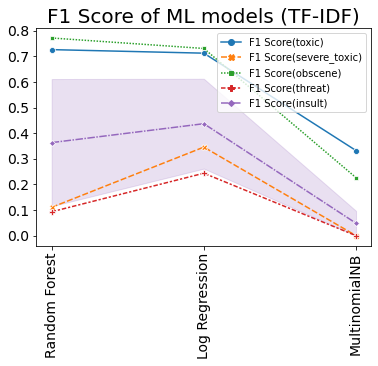

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=f1_complete,markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.title('F1 Score of ML models (TF-IDF)', fontsize=20)

From above we can conclude that Logistic Regression is somewhat better thanRandom forest and much better than MultinomialNB. Therefore, we will test our model using Logistic Regression.

In [102]:
X = df_toxic.comment_text
y = df_toxic['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfidf.fit_transform(X_train)  
X_test_fit = tfidf.transform(X_test) 

lr = LogisticRegression()

lr.fit(X_train_fit, y_train)
lr.predict(X_test_fit)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 0, 0])

In [105]:
# Sample Prediction
comment1 = ['Hey You son of a Bitch, get off my back dickhead']
comment2 = ['Good morning, nice to meet you']

comment1_tfidf = tfidf.transform(comment1)
lr.predict_proba(comment1_tfidf)[:,1]

array([0.99424748])

In [106]:
comment2_tfidf = tfidf.transform(comment2)
lr.predict_proba(comment2_tfidf)[:,1]

array([0.09099361])

As we can see, the model has classified the first comment to be highly toxic with a probability of 0.99 and the second as a low toxic sentence with just 0.09 probability